<a href="https://colab.research.google.com/github/andrewRowlinson/data-science/blob/master/football/complicated_heatmap_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 1.7 MB/s eta 0:00:00


In [2]:
from mplsoccer.heatmap import _BinnedStatisticResult
from mplsoccer import Pitch, Sbopen
import pandas as pd
import numpy as np

# get data
parser = Sbopen()
pitch = Pitch(line_zorder=3)

match_files = [19789, 19794, 19805]
df = pd.concat([parser.event(file)[0] for file in match_files])  # 0 index is the event file
# filter chelsea pressure events
mask_chelsea_pressure = (df.team_name == 'Chelsea FCW') & (df.type_name == 'Pressure')
df = df.loc[mask_chelsea_pressure, ['x', 'y']]
x = df.x
y = df.y

x_dim = np.concatenate([pitch.dim.positional_x[0:1], [pitch.dim.six_yard_left],
                        pitch.dim.positional_x[1:-1],
                        [pitch.dim.six_yard_right], pitch.dim.positional_x[-1:]]
                       )
y_dim = pitch.dim.positional_y

# Plot initial heatmap with all boxes (some of these need to be combined)

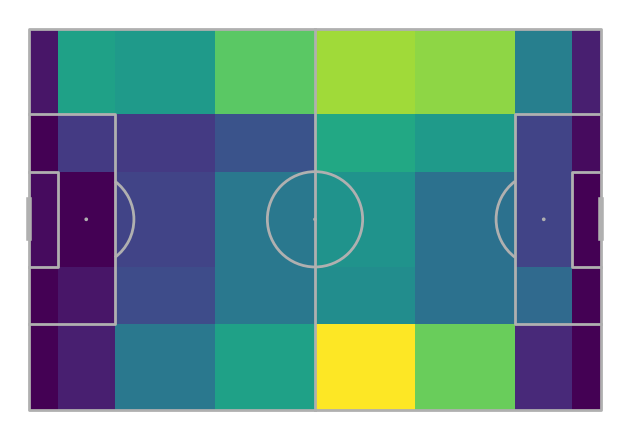

In [3]:
fig, ax = pitch.draw()
bs = pitch.bin_statistic(x, y, bins=(x_dim, y_dim))
hm = pitch.heatmap(bs, ax=ax)

# Build individual parts|

# Right and left penalty area

In [4]:
# sides
bs1 = pitch.bin_statistic(x, y, bins=(x_dim[[0, 2, 3, 4, 5, 6, 8]], y_dim))
# middle
bs2 = pitch.bin_statistic(x, y, bins=(x_dim[[0, 1, 2, 4, 6, 7, 8]], y_dim))

In [5]:
side1 = _BinnedStatisticResult(bs1['statistic'][:1, :],
                               bs1['x_grid'][:2, :],
                               bs1['y_grid'][:2, :],
                               bs1['cx'][:1, :],
                               bs1['cy'][:1, :],
                               None,
                               None
                               )._asdict()

middle = _BinnedStatisticResult(bs2['statistic'][1: -1, :],
                                bs2['x_grid'][1: -1, :],
                                bs2['y_grid'][1: -1, :],
                                bs2['cx'][-2, :],
                                bs2['cy'][-2:, :],
                                None,
                                None
                                )._asdict()

side2 = _BinnedStatisticResult(bs1['statistic'][-1:, :],
                               bs1['x_grid'][-2:, :],
                               bs1['y_grid'][-2:, :],
                               bs1['cx'][-1, :],
                               bs1['cy'][-1:, :],
                               None,
                               None
                               )._asdict()

stats = [side1, middle, side2]

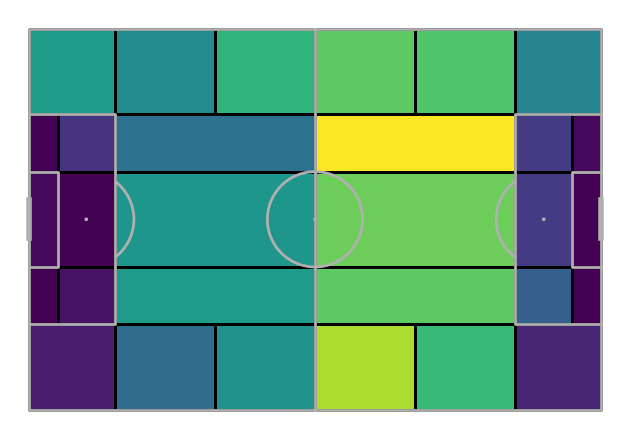

In [6]:
fig, ax = pitch.draw()
hm = pitch.heatmap_positional(stats, ec='black', ax=ax)